<h1 style="text-align:center">Undamped Response to Harmonic Seismic Inputs</h1>
<h3 style="text-align:center">MCHE 485: Mechanical Vibrations</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpring_Seismic_Horiz.png" alt="A Mass-Spring-Damper System" width=50%/></a><br>
    <strong> Figure 1: A Mass-Spring System </strong>
</p>

This notebook examines the frequency response of a simple mass-spring system like the one shown in Figure 1. It has a position input, $ y(t) $, that is known to be harmonic connected to the mass, $ m $, via a spring of stiffness $ k $. The position of the mass is defined by $ x(t) $.

The equation of motion for the system is:

<!-- the \quad commmand just adds a space in the math mode -->
$ \quad m \ddot{x} + kx = ky $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency, $\omega_n$.

$ \quad \ddot{x} + \omega_n^2x = \omega_n^2 y$

For information on how to obtain this equation, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

In [1]:
import numpy as np              # Grab all of the NumPy functions with nickname np

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline

In [3]:
# Import the plotting functions 
import matplotlib.pyplot as plt

In [4]:
# Define the System Parameters
m = 1.0                 # kg
k = (2.*np.pi)**2.      # N/m (Selected to give an undamped natural frequency of 1Hz)
wn = np.sqrt(k/m)       # Natural Frequency (rad/s)

Let's use the closed-form, steady-state solution we developed in lecture:

Assume:

$ \quad y(t) = \bar{y} \sin{\omega t} $

Then, the solution $x(t)$ should have the form:

$ \quad x(t) = a \sin{\omega t} + b \cos{\omega t} $

We saw that when we substituted this assumed solution into the equations of motion for this undamped system, the $b$ constant was elimiinated, leaving:

$ \quad x(t) = \frac{\omega_n^2}{\omega_n^2 - \omega^2}\bar{y} \sin{\omega t} $

or 

$ \quad x(t) = \frac{\omega_n^2}{\omega_n^2 - \omega^2} y(t) $

So, $ \frac{\omega_n^2}{\omega_n^2 - \omega^2} $ gives us the relationship between the input $ y(t) $ and the system response $ x(t) $. Let's plot that for a range of frequencies.

In [5]:
# Set up input parameters
w = np.linspace(0,wn*3,500)            # Frequency range for freq response plot, 0-3x wn with 500 points in-between

x_amp = (wn**2) / (wn**2 - w**2)

# Let's mask the discontinuity, so it isn't plotted
pos = np.where(np.abs(x_amp) >= 15)
x_amp[pos] = np.nan
w[pos] = np.nan

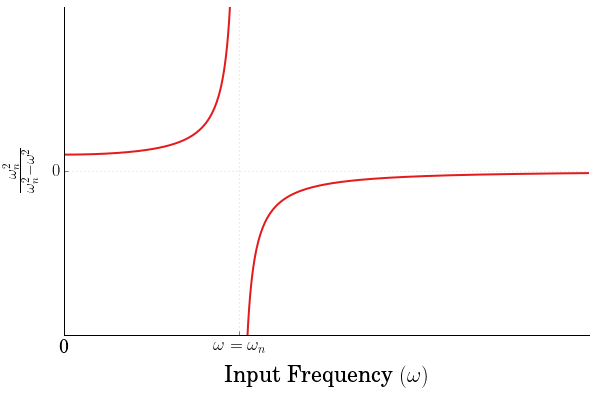

In [6]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.2,left=0.15,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Input Frequency $\left(\omega\right)$',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylabel(r'$ \frac{\omega_n^2}{\omega_n^2 - \omega^2} $',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylim(-10.0,10.0)
plt.yticks([0])
plt.xticks([0,1],['0','$\omega = \omega_n$'])

plt.plot(w/wn, x_amp, linewidth=2)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MassSpring_SeismicFreqResp_Amplitude.pdf',dpi=300)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

### Magnitude of the Response
We can also plot the magnitude of this.

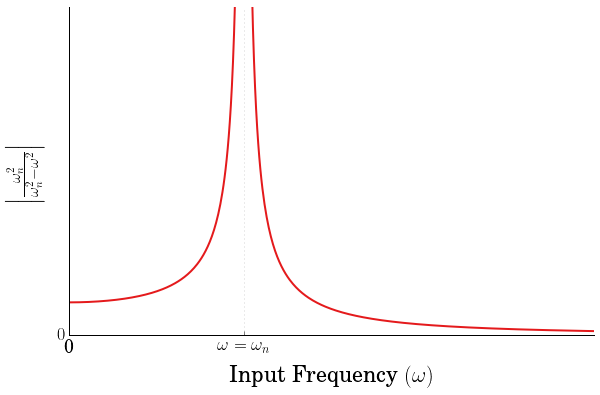

In [7]:
# Define the magnitude of the response
x_mag = np.abs(x_amp)

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.2,left=0.15,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Input Frequency $\left(\omega\right)$',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylabel(r'$ \left|\frac{\omega_n^2}{\omega_n^2 - \omega^2} \right|$',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylim(0.0,10.0)
plt.yticks([0])
plt.xticks([0,1],['0','$\omega = \omega_n$'])

plt.plot(w/wn,x_mag,linewidth=2)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# savefig('MassSpring_SeismicFreqResp_Magnitude.pdf',dpi=300)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

In [8]:
# Set up input parameters
w = np.linspace(0,wn*3,500)            # Frequency range for freq response plot, 0-3x wn with 500 points in-between

xddot_amp = -(wn**2 * w**2) / (wn**2 - w**2)

# Let's mask the discontinuity, so it isn't plotted
pos = np.where(np.abs(xddot_amp) >= 600)
xddot_amp[pos] = np.nan
w[pos] = np.nan

### Acceleration 
Now, let's look at the acceleration of the mass, $\ddot{x}(t)$, for the same seismic input, y(t).

$ \quad \ddot{x}(t) = \frac{-\omega_n^2\omega^2}{\omega_n^2 - \omega^2}\bar{y} \sin{\omega t} $

or 

$ \quad x(t) = \frac{-\omega_n^2\omega^2}{\omega_n^2 - \omega^2} y(t) $

So, $ \frac{-\omega_n^2\omega^2}{\omega_n^2 - \omega^2} $ gives us the relationship between the input $ y(t) $ and the acceleration of the mass, $ \ddot{x}(t) $. Let's plot that for a range of frequencies.

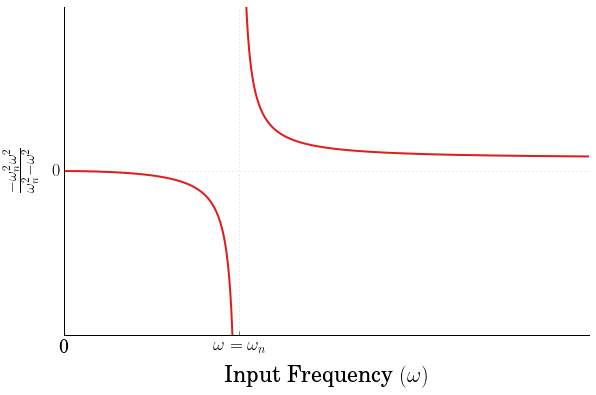

In [9]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.20,left=0.15,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Input Frequency $\left(\omega\right)$',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylabel(r'$ \frac{-\omega_n^2 \omega^2}{\omega_n^2 - \omega^2} $',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylim(-500.0,500.0)
plt.yticks([0])
plt.xticks([0,1],['0','$\omega = \omega_n$'])

plt.plot(w/wn,xddot_amp,linewidth=2)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MassSpring_SeismicFreqResp_AccelAmplitude.pdf',dpi=300)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

### Normalization
We could also normalize the input frequency, $ \omega $, based on its relationship to the natural frequency of the system, $ \omega_n$. To do so, divide both the numerator and denominator of:

$ \quad x(t) = \frac{\omega_n^2}{\omega_n^2 - \omega^2}\bar{y} \sin{\omega t} $

by $\omega_n$. We can then define $\Omega \equiv \frac{\omega}{\omega_n} $ and write:

$ \quad x(t) = \left(\frac{1}{1-\Omega^2}\right) \bar{y} \sin{\omega t} $

The term $\frac{1}{1-\Omega^2}$ then gives us a normalized version of the amplitude of vibration by plotting it versus $\Omega$.


In [10]:
# Set up input parameters
wnorm = np.linspace(0,3,500)            # Frequency range for freq response plot, 0-3x wn with 500 points in-between

xnorm_amp = (1) / (1 - wnorm**2)

# Let's mask the discontinuity, so it isn't plotted
pos = np.where(np.abs(xnorm_amp) >= 15)
x_amp[pos] = np.nan
wnorm[pos] = np.nan

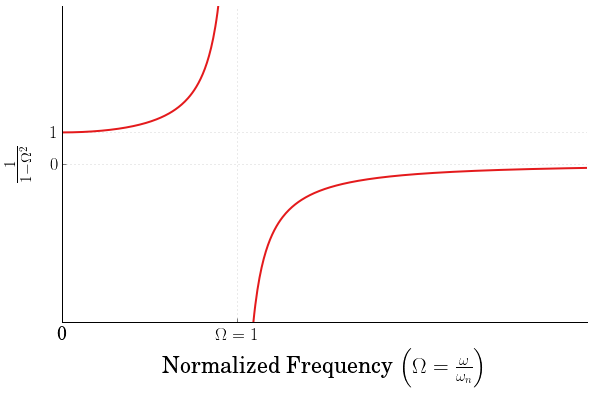

In [11]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.23,left=0.15,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Normalized Frequency $\left(\Omega = \frac{\omega}{\omega_n}\right)$',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'$ \frac{1}{1 - \Omega^2} $',family='serif',fontsize=22,weight='bold',labelpad=15)
plt.ylim(-5.0,5.0)
plt.yticks([0,1])
plt.xticks([0,1],['0','$\Omega = 1$'])

plt.plot(wnorm, xnorm_amp, linewidth=2)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# savefig('MassSpring_SeismicFreqResp_NormAmp.pdf',dpi=300)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

### Magnitude of the Response
We can also plot the magnitude of the normalized response

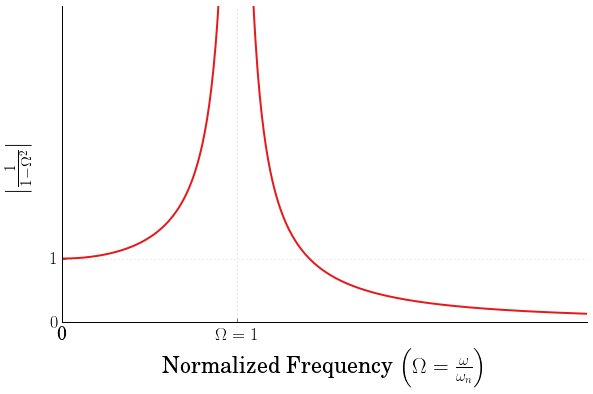

In [12]:
# Take the absolute value to get the magnitude
xnorm_mag = np.abs(xnorm_amp)

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.23,left=0.15,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Normalized Frequency $\left(\Omega = \frac{\omega}{\omega_n}\right)$',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'$ \left| \frac{1}{1 - \Omega^2} \right|$',family='serif',fontsize=22,weight='bold',labelpad=15)
plt.ylim(0.0,5.0)
plt.yticks([0,1])
plt.xticks([0,1],['0','$\Omega = 1$'])

plt.plot(wnorm,xnorm_mag,linewidth=2)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MassSpring_SeismicFreqResp_NormMag.pdf',dpi=300)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

<br>
<hr class = "style-end">
#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.



In [13]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(open(css_file, "r").read())